In [418]:
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle,ConnectionPatch,Arc
from math import sqrt 

## FUNCTIONS

In [138]:
def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

In [7]:
with open('..\data\competitions.json') as f:
    data = json.load(f)
    competition = pd.DataFrame(data)

In [417]:
competition

,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
0,37,42,England,FA Women's Super League,female,2019/2020,2020-03-11T14:09:41.932138,2020-03-11T14:09:41.932138
1,37,4,England,FA Women's Super League,female,2018/2019,2020-02-27T15:59:58.148,2020-02-27T15:59:58.148
2,43,3,International,FIFA World Cup,male,2018,2019-12-16T23:09:16.168756,2019-12-16T23:09:16.168756
3,11,4,Spain,La Liga,male,2018/2019,2020-02-27T12:19:39.458017,2020-02-27T12:19:39.458017
4,11,1,Spain,La Liga,male,2017/2018,2020-02-27T12:19:39.458017,2020-02-27T12:19:39.458017
5,11,2,Spain,La Liga,male,2016/2017,2019-12-16T23:09:16.168756,2019-12-16T23:09:16.168756
6,11,27,Spain,La Liga,male,2015/2016,2019-12-16T23:09:16.168756,2019-12-16T23:09:16.168756
7,11,26,Spain,La Liga,male,2014/2015,2019-12-16T23:09:16.168756,2019-12-16T23:09:16.168756
8,11,25,Spain,La Liga,male,2013/2014,2019-12-16T23:09:16.168756,2019-12-16T23:09:16.168756
9,11,24,Spain,La Liga,male,2012/2013,2019-12-16T23:09:16.168756,2019-12-16T23:09:16.168756


In [378]:
with open('..\data\matches\\11\\4.json',encoding="utf8") as f:
    data = json.load(f)
    season_18_19 = json_normalize(data)

C:\Users\TDias\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [379]:
season_18_19

,match_id,match_date,kick_off,home_score,away_score,match_status,last_updated,match_week,competition.competition_id,competition.country_name,...,competition_stage.id,competition_stage.name,stadium.id,stadium.name,stadium.country.id,stadium.country.name,referee.id,referee.name,referee.country.id,referee.country.name
0,16215,2019-03-17,20:45:00.000,1,4,available,2019-12-16T23:09:16.168756,28,11,Spain,...,1,Regular Season,352.0,Estadio Benito Villamarín,214.0,Spain,215.0,Ricardo De Burgos,112.0,Italy
1,16196,2019-03-02,20:45:00.000,0,1,available,2019-12-16T23:09:16.168756,26,11,Spain,...,1,Regular Season,353.0,Estadio Santiago Bernabéu,214.0,Spain,221.0,Alberto Undiano,112.0,Italy
2,16205,2019-03-09,18:30:00.000,3,1,available,2019-12-16T23:09:16.168756,27,11,Spain,...,1,Regular Season,342.0,Camp Nou,214.0,Spain,209.0,Mario Melero,112.0,Italy
3,16131,2019-01-13,18:30:00.000,3,0,available,2019-12-16T23:09:16.168756,19,11,Spain,...,1,Regular Season,342.0,Camp Nou,214.0,Spain,183.0,Jesús Gil,214.0,Spain
4,16149,2019-01-27,16:15:00.000,0,2,available,2019-12-16T23:09:16.168756,21,11,Spain,...,1,Regular Season,343.0,Estadi Municipal de Montilivi,214.0,Spain,219.0,Pablo González,112.0,Italy
5,16265,2019-04-20,20:45:00.000,2,1,available,2019-12-16T23:09:16.168756,33,11,Spain,...,1,Regular Season,342.0,Camp Nou,214.0,Spain,219.0,Pablo González,112.0,Italy
6,16086,2018-12-08,20:45:00.000,0,4,available,2019-12-16T23:09:16.168756,15,11,Spain,...,1,Regular Season,351.0,RCDE Stadium,214.0,Spain,223.0,Carlos Del Cerro,112.0,Italy
7,16157,2019-02-02,18:30:00.000,2,2,available,2019-12-16T23:09:16.168756,22,11,Spain,...,1,Regular Season,342.0,Camp Nou,214.0,Spain,221.0,Alberto Undiano,112.0,Italy
8,16317,2019-05-19,16:15:00.000,2,2,available,2019-12-16T23:09:16.168756,38,11,Spain,...,1,Regular Season,347.0,Estadio Municipal de Ipurúa,214.0,Spain,224.0,José Munuera,112.0,Italy
9,16275,2019-04-23,21:30:00.000,0,2,available,2019-12-16T23:09:16.168756,34,11,Spain,...,1,Regular Season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [385]:
ls=[]
for match_id in season_18_19['match_id']: 
    with open('..\data\events\\'+ str(match_id) +'.json',encoding="utf8") as f:
        data = json.load(f)
        match = json_normalize(data)
        ls.append(match)

C:\Users\TDias\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


In [435]:
lst_concat=[match[(match['type.name']=='Shot') & (match['team.name']=='Barcelona')][['minute','second','player.id','player.name','location','shot.type.id','shot.type.name','shot.body_part.id','shot.body_part.name','shot.technique.id','shot.technique.name','shot.first_time','shot.freeze_frame','shot.outcome.id','shot.outcome.name','shot.end_location']].reset_index() for match in ls]
shots=pd.concat(lst_concat).reset_index().drop('level_0',axis=1)
shots

,index,minute,second,player.id,player.name,location,shot.type.id,shot.type.name,shot.body_part.id,shot.body_part.name,shot.technique.id,shot.technique.name,shot.first_time,shot.freeze_frame,shot.outcome.id,shot.outcome.name,shot.end_location
0,834,17,13,5503.0,Lionel Andrés Messi Cuccittini,"[95.6, 44.4]",62.0,Free Kick,38.0,Left Foot,93.0,Normal,NaN,"[{'location': [107.4, 43.7], 'player': {'id': ...",97.0,Goal,"[120.0, 36.8, 2.2]"
1,1173,24,28,5503.0,Lionel Andrés Messi Cuccittini,"[94.0, 46.1]",62.0,Free Kick,38.0,Left Foot,93.0,Normal,NaN,"[{'location': [104.2, 45.0], 'player': {'id': ...",100.0,Saved,"[119.1, 43.1, 1.5]"
2,1799,39,16,5246.0,Luis Alberto Suárez Díaz,"[106.0, 46.0]",87.0,Open Play,38.0,Left Foot,93.0,Normal,True,"[{'location': [94.4, 44.4], 'player': {'id': 5...",100.0,Saved,"[117.8, 42.0, 0.2]"
3,1871,40,37,5246.0,Luis Alberto Suárez Díaz,"[110.8, 51.6]",87.0,Open Play,40.0,Right Foot,93.0,Normal,NaN,"[{'location': [100.3, 50.5], 'player': {'id': ...",96.0,Blocked,"[111.3, 51.0]"
4,1963,44,11,5213.0,Gerard Piqué Bernabéu,"[111.7, 40.2]",87.0,Open Play,37.0,Head,93.0,Normal,NaN,"[{'location': [111.0, 37.7], 'player': {'id': ...",96.0,Blocked,"[112.2, 40.4]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,3659,68,44,5503.0,Lionel Andrés Messi Cuccittini,"[99.5, 40.7]",87.0,Open Play,38.0,Left Foot,93.0,Normal,True,"[{'location': [115.8, 40.1], 'player': {'id': ...",100.0,Saved,"[115.5, 41.4, 0.2]"
517,3662,68,46,3109.0,Malcom Filipe Silva de Oliveira,"[107.5, 53.6]",87.0,Open Play,38.0,Left Foot,91.0,Half Volley,True,"[{'location': [108.9, 37.0], 'player': {'id': ...",100.0,Saved,"[118.4, 44.0, 1.5]"
518,4190,83,23,5503.0,Lionel Andrés Messi Cuccittini,"[99.5, 47.8]",87.0,Open Play,38.0,Left Foot,93.0,Normal,NaN,"[{'location': [118.2, 39.5], 'player': {'id': ...",96.0,Blocked,"[100.8, 47.1]"
519,4212,84,15,5246.0,Luis Alberto Suárez Díaz,"[97.7, 28.8]",87.0,Open Play,40.0,Right Foot,93.0,Normal,NaN,"[{'location': [118.3, 39.5], 'player': {'id': ...",97.0,Goal,"[120.0, 43.7, 0.2]"


In [436]:
shots = shots[shots['shot.freeze_frame'].notna()].reset_index(drop=True)
ls1=[[sqrt((di['location'][0] - v['location'][0]) ** 2 + (di['location'][1] - v['location'][1]) ** 2)<2 for v in di['shot.freeze_frame'] if v['teammate']==False] for di in shots.to_dict('records')]
col=[True in element for element in ls1]
shots['under_pressure']=col

In [442]:
shots

,index,minute,second,player.id,player.name,location,shot.type.id,shot.type.name,shot.body_part.id,shot.body_part.name,shot.technique.id,shot.technique.name,shot.first_time,shot.freeze_frame,shot.outcome.id,shot.outcome.name,shot.end_location,under_pressure
0,834,17,13,5503.0,Lionel Andrés Messi Cuccittini,"[95.6, 44.4]",62.0,Free Kick,38.0,Left Foot,93.0,Normal,NaN,"[{'location': [107.4, 43.7], 'player': {'id': ...",97.0,Goal,"[120.0, 36.8, 2.2]",False
1,1173,24,28,5503.0,Lionel Andrés Messi Cuccittini,"[94.0, 46.1]",62.0,Free Kick,38.0,Left Foot,93.0,Normal,NaN,"[{'location': [104.2, 45.0], 'player': {'id': ...",100.0,Saved,"[119.1, 43.1, 1.5]",False
2,1799,39,16,5246.0,Luis Alberto Suárez Díaz,"[106.0, 46.0]",87.0,Open Play,38.0,Left Foot,93.0,Normal,True,"[{'location': [94.4, 44.4], 'player': {'id': 5...",100.0,Saved,"[117.8, 42.0, 0.2]",False
3,1871,40,37,5246.0,Luis Alberto Suárez Díaz,"[110.8, 51.6]",87.0,Open Play,40.0,Right Foot,93.0,Normal,NaN,"[{'location': [100.3, 50.5], 'player': {'id': ...",96.0,Blocked,"[111.3, 51.0]",True
4,1963,44,11,5213.0,Gerard Piqué Bernabéu,"[111.7, 40.2]",87.0,Open Play,37.0,Head,93.0,Normal,NaN,"[{'location': [111.0, 37.7], 'player': {'id': ...",96.0,Blocked,"[112.2, 40.4]",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,3659,68,44,5503.0,Lionel Andrés Messi Cuccittini,"[99.5, 40.7]",87.0,Open Play,38.0,Left Foot,93.0,Normal,True,"[{'location': [115.8, 40.1], 'player': {'id': ...",100.0,Saved,"[115.5, 41.4, 0.2]",False
509,3662,68,46,3109.0,Malcom Filipe Silva de Oliveira,"[107.5, 53.6]",87.0,Open Play,38.0,Left Foot,91.0,Half Volley,True,"[{'location': [108.9, 37.0], 'player': {'id': ...",100.0,Saved,"[118.4, 44.0, 1.5]",False
510,4190,83,23,5503.0,Lionel Andrés Messi Cuccittini,"[99.5, 47.8]",87.0,Open Play,38.0,Left Foot,93.0,Normal,NaN,"[{'location': [118.2, 39.5], 'player': {'id': ...",96.0,Blocked,"[100.8, 47.1]",True
511,4212,84,15,5246.0,Luis Alberto Suárez Díaz,"[97.7, 28.8]",87.0,Open Play,40.0,Right Foot,93.0,Normal,NaN,"[{'location': [118.3, 39.5], 'player': {'id': ...",97.0,Goal,"[120.0, 43.7, 0.2]",False


In [445]:
shots.to_csv('..\data\produced_datasets\season_18_19_shots.csv')

In [353]:
shot_freeze_frame=pd.DataFrame(shots['shot.freeze_frame'][8])
shot_freeze_frame['close_opponent']=ls1

In [354]:
shot_freeze_frame['player_id']=[x['id'] for x in shot_freeze_frame['player']]
shot_freeze_frame['position_id']=[x['id'] for x in shot_freeze_frame['position']]

In [355]:
shot_freeze_frame=shot_freeze_frame.drop(['player','position'],axis=1)

In [356]:
shot_freeze_frame

,location,teammate,close_opponent,player_id,position_id
0,"[85.4, 40.4]",False,False,7068,4
1,"[104.5, 34.7]",False,True,6777,5
2,"[95.2, 48.1]",True,False,5503,24
3,"[116.6, 37.2]",False,False,6792,1


In [309]:
shot_freeze_frame['x']=shot_freeze_frame['location'].apply(lambda x:x[0])
shot_freeze_frame['y']=shot_freeze_frame['location'].apply(lambda x:x[1])

In [310]:
shot_freeze_frame=shot_freeze_frame.drop('location', axis=1)

In [311]:
df=shot_freeze_frame
df

,teammate,player_id,position_id,x,y
0,False,7068,4,85.4,40.4
1,False,6777,5,104.5,34.7
2,True,5503,24,95.2,48.1
3,False,6792,1,116.6,37.2


In [312]:
(shots['location'][3])

[110.8, 51.6]

In [313]:
x=df[df['teammate']==True]['x']
y=df[df['teammate']==True]['y']
z=df[df['teammate']==False]['x']
d=df[df['teammate']==False]['y']

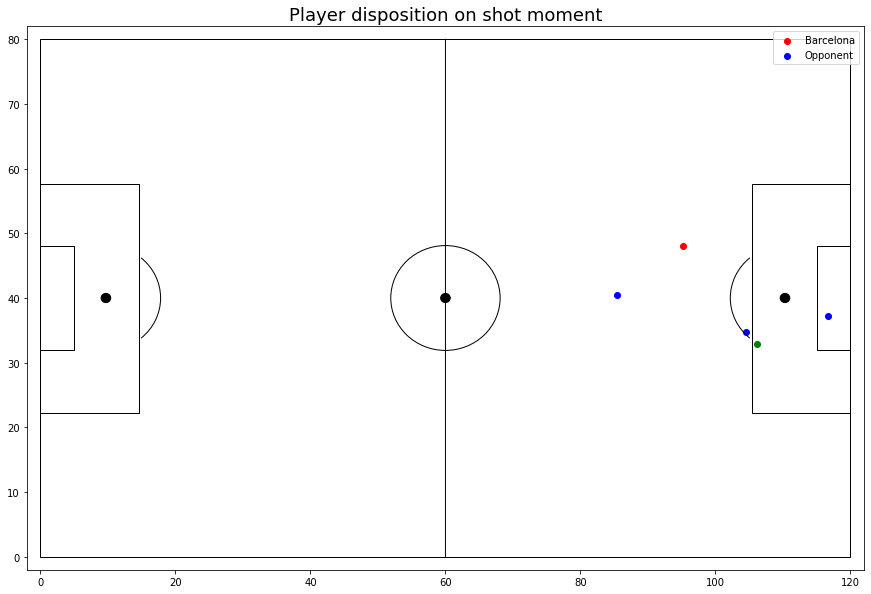

In [314]:
fig=plt.figure() #set up the figures
fig.set_size_inches(15, 10)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.scatter(x, y, c='red' ,label='Barcelona')
plt.scatter(z, d, c='blue' ,label = 'Opponent')
plt.scatter(shots['location'][8][0],shots['location'][8][1], c='green')
#cicle1=plt.Circle((shots['location'][2][0], shots['location'][2][1]), 3, color='r')
plt.ylim(-2, 82)
plt.xlim(-2, 122)
#plt.axis('off')
ax.set_title('Player disposition on shot moment', 
             y=1.0, fontsize=18)
#ax.add_artist(cicle1)
plt.legend(loc='upper right')
plt.show()